In [1]:
#import library
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset 
df1= pd.read_csv('Fraud.csv')

In [3]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df1.shape

(6362620, 11)

In [5]:
#EDA

In [6]:
df1.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
#Descriptive analysis
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#check for data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
#check for missing values
df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#let us visualize
#sns.heatmap(df1.isnull(),yticklabels=False, cmap='viridis')

In [11]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
#plt.subplots(figsize=(20,5))
#sns.distplot(df1['amount'])

In [13]:
#Handling categorical data
df1['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

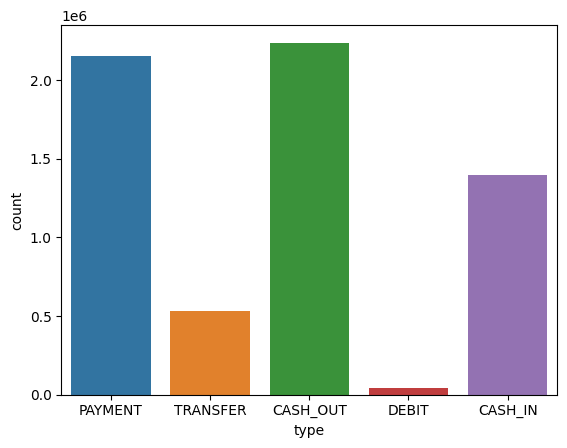

In [14]:
#let us vizualize<Axes: xlabel='type', ylabel='count'>

sns.countplot(x='type', data= df1)

In [15]:
fraud_count = df1.groupby(['type','isFraud']).size().reset_index().rename(columns={0:'Fruad_count'})

In [16]:
fraud_count

,type,isFraud,Fruad_count
0,CASH_IN,0,1399284
1,CASH_OUT,0,2233384
2,CASH_OUT,1,4116
3,DEBIT,0,41432
4,PAYMENT,0,2151495
5,TRANSFER,0,528812
6,TRANSFER,1,4097


<Axes: xlabel='isFraud', ylabel='count'>

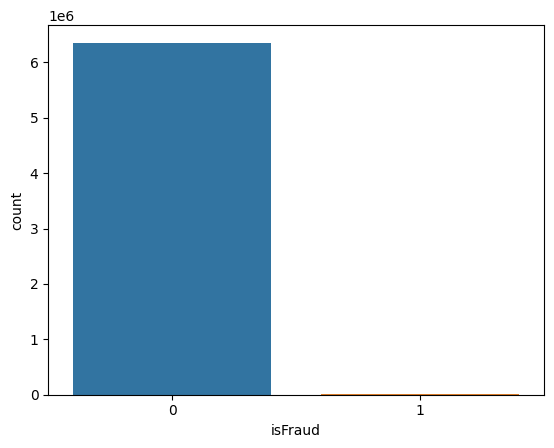

In [17]:
#check for imbalance data
sns.countplot(x='isFraud', data= df1)

In [18]:
df1['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [19]:
#Feature Engineering

In [20]:
df1.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [21]:
df1.drop(['step','nameOrig','nameDest'],axis=1,inplace=True)

In [22]:
df1

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [23]:
#Handaling Imbalance data

In [24]:
#Get the Fraund and Normal Data
fraud = df1[df1['isFraud']==1]
normal = df1[df1['isFraud']==0]

In [25]:
print(fraud.shape, normal.shape)

(8213, 8) (6354407, 8)


In [26]:
from sklearn.utils import resample

In [27]:
up_fraud =resample(fraud,replace=True,n_samples=len(normal),random_state=24) 

In [28]:
df1 = pd.concat([normal,up_fraud])

In [29]:
normal.shape,up_fraud.shape

((6354407, 8), (6354407, 8))

<Axes: xlabel='isFraud', ylabel='count'>

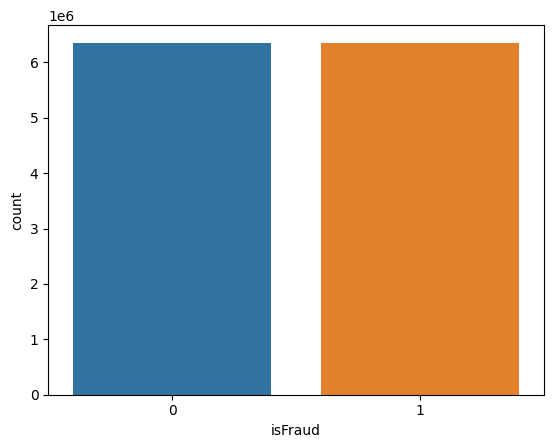

In [30]:
sns.countplot(x='isFraud',data= df1)

In [31]:
dummy1= pd.get_dummies(df1['type'])

In [32]:
dummy1

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
2760470,0,0,0,0,1
6259924,0,0,0,0,1
6232502,0,0,0,0,1
3571171,0,0,0,0,1


In [33]:
df1 = pd.concat([dummy1,df1],axis=1)

In [34]:
df1.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,0,1,0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,0,0,0,1,0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,0,0,0,1,0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,0,0,0,1,0,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,0,0,0,1,0,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [35]:
df1.drop('type', axis = 1,inplace=True)

In [36]:
#split in to x and y

In [37]:
x= df1.drop('isFraud', axis=1)

In [38]:
x.head(3)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0,0,0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,0,0,0,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
4,0,0,0,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


In [39]:
x.shape

(12708814, 11)

In [40]:
y = df1['isFraud']

In [41]:
y= to_categorical(y)

In [42]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [43]:
y.shape

(12708814, 2)

In [44]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [45]:
sc_x

array([[-0.35174721, -0.86215695, -0.05719058, ..., -0.2446418 ,
        -0.33142095, -0.03101977],
       [-0.35174721, -0.86215695, -0.05719058, ..., -0.2446418 ,
        -0.33142095, -0.03101977],
       [-0.35174721, -0.86215695, -0.05719058, ..., -0.2446418 ,
        -0.33142095, -0.03101977],
       ...,
       [-0.35174721, -0.86215695, -0.05719058, ..., -0.2446418 ,
        -0.33142095, -0.03101977],
       [-0.35174721, -0.86215695, -0.05719058, ..., -0.2446418 ,
        -0.33142095, -0.03101977],
       [-0.35174721, -0.86215695, -0.05719058, ..., -0.2446418 ,
        -0.33142095, -0.03101977]])

In [46]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.2, random_state=42)

In [47]:
x_train.shape,x_test.shape

((10167051, 11), (2541763, 11))

In [48]:
y_train.shape, y_test.shape

((10167051, 2), (2541763, 2))

In [49]:
#Create the model

In [50]:
model = Sequential()
model.add(Dense(8, activation='relu',input_shape=(11,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

In [51]:
#model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_2 (Batc  (None, 32)               1

In [52]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [53]:
#Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
154886/158861 [============================>.] - ETA: 15s - loss: 0.0556 - acc: 0.9818

In [54]:
#Model Evaluation
loss,acc = model.evaluate(x_test,y_test)

99288/99288 [==============================] - 243s 2ms/step - loss: 0.1121 - acc: 0.9457


In [80]:
#Save the model
model.save('C:/Users/feaie/Downloads/deep learning/saved_model/my_model.h5')

In [81]:
#Load the model
from keras.models import load_model

In [82]:
loaded_model = load_model('C:/Users/feaie/Downloads/deep learning/saved_model/my_model.h5')

In [83]:
loaded_model